<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           Doing required Imports
</h1>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           Loading the data
</h1>
</div>

In [2]:
df = pd.read_csv('/kaggle/input/fraud-csv-dataset/Fraud.csv')

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           Looking at some data
</h1>
</div>

In [3]:
len(df)

6362620

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           Checking for missing values
</h1>
</div>

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<div style="background-color: #C1F2B0;
            border-radius: 10px;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
                font-size: 14px">
        Conclusion from above output cell: there are no missing values in the dataset
    </li>
</ul>
    
</div>

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    Now let's Explore <span style="color: #54B435">type</span> column
</h1>
</div>

In [7]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

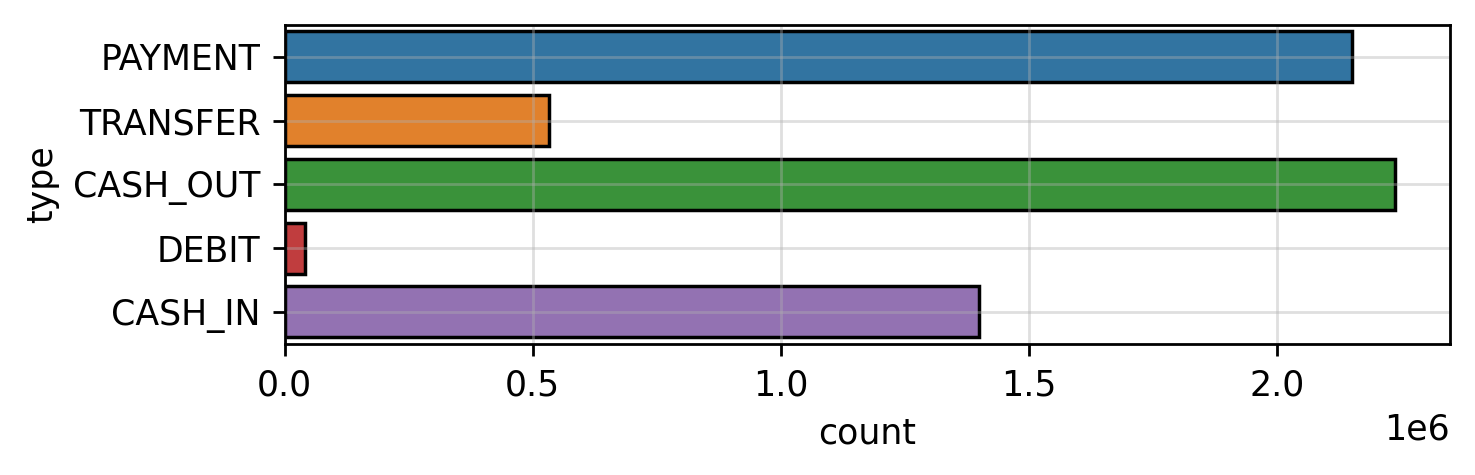

In [8]:
# visualize type column
plt.figure(figsize=(6,2), dpi=250)
sns.countplot(data=df, y='type', edgecolor='black')
plt.grid(alpha=0.4)
plt.tight_layout()

plt.show();

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           let's look at the <span style="color: #65B741;">isFraud</span> & <span style="color: #65B741;">isFlaggedFraud</span> column
</h1>
</div>

* **isFraud** helps analyze completed fraud and improve detection models.
* **isFlaggedFraud** helps prevent potential fraud and minimize losses.

In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<div style="background-color: #C1F2B0;
            border-radius: 10px;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
        <li style="color: black;
                   font-size: 14px">
            <b>Conclusion from above output cell:</b> 0 means <b>6354407</b> transactions are not considered as fraudulent!
        </li>
    <li style="color: black;
                   font-size: 14px">
            1 means <b>8213</b> transactions are fraudulent!
    </li>
</ul>
    
</div>

In [10]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

<div style="background-color: #C1F2B0;
            border-radius: 10px;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
                font-size: 14px">
        here also, 0 means <b>6362604</b> transactions have <b>not been flagged as potentially fraudulent</b>, based on the predefined rule of <b>transfers exceeding 200,000</b> and
    </li>
    <li style="color: black;
                font-size: 14px">
        1 means there are <b>only 16</b> transactions that have been flagged as potentially fraudulent according to the 200,000 threshold rule.
    </li>
</ul>
    
</div>

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           Simply checking transactions whose <span style="color: #65B741">amount > 200,000</span>
</h1>
</div>

In [11]:
df[df['amount'] > 200_000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


<div style="background-color: #C1F2B0;
            border-radius: 10px;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
        <li style="color: black;
                    font-size: 14px">
            <b>Conclusion from above output cell:</b> <i>1673570 rows × 11 columns</i>, means that it's <b>not necessary that all large transactions are fraudulent!</b>
        </li>
</ul>
    
</div>

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           let's find patterns or behaviour of those who fall in <span style="color: #65B741">isFraud</span> category!
</h1>
</div>

> Those as we checked above, are total 8213

In [12]:
isFraud_df = df[df['isFraud'].values == 1]
isFraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [13]:
count_M = 0
for i in isFraud_df['nameDest'].values:
    if i[0] == 'M':
        count_M += 1
        
print(count_M)

0


<div style="background-color: #C1F2B0;
            border-radius: 10px;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
                font-size: 14px">
        <b>Conclusion from above output cell:</b> all 8213 labelled <b>isFraud</b>, have <b>nameDest starting with 'C' and not 'M'</b> that means <b>Merchants(M) whose information we don't have, are not Fraud!</b> Only those starting with 'C' are fraud!
    </li>
</ul>
    
</div>

In [14]:
fig = px.histogram(isFraud_df, x='type',
                   range_y=[4000, 4150],
                   color='type',
                   color_discrete_sequence=['#C499F3', '#7E30E1'])

fig.update_layout(width=500, height=350,
                  title_text='Transaction Type vs. Total Count of those Transactions',
                  plot_bgcolor='#000000')

<div style="background-color: #C1F2B0;
            border-radius: 10px;">
<h1 style="text-indent: 1%;
           font-size: 14px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
    <b>Conclusion from above output cell:</b>
</h1>
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 14px">
        There are 2,237,500 that is 2.2 Million customers who have performed CASH_OUT and 532,909 customers who have performed TRANSFER (which we looked before).
    </li>
    <li style="color: black;
               font-size: 14px">
        So, <b>(4116 / 2,237,500) CASH_OUT</b> and <b>(4097 / 532,909) TRANSFER</b> are considered <b>isFraud.</b>
    </li>
</ul>
</div>

In [15]:
fig = px.scatter(isFraud_df, x='oldbalanceOrg', y='amount',
                 color='amount', color_continuous_scale='Greens')

fig.update_layout(width=800, height=400,
                  title_text='Origin Old Balance vs. Amount Transact (isFraud)',
                  plot_bgcolor='#DDDDDD')

fig.update_traces(marker_size=10,
                  marker=dict(
                      line=dict(color='black', width=2)
                  )
                 )

<div style="background-color: #C1F2B0;
            border-radius: 10px;">
<h1 style="text-indent: 1%;
           font-size: 14px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
    <b>Conclusion from above output cell:</b>
</h1>
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 14px">
        there are customers who have 0 balance in their account still transaction has been done, which indicates isFraud!
    </li>
    <li style="color: black;
               font-size: 14px">
        Maybe, If the <b>newbalanceDest did not have such a large amount of money previously</b>, it could be an <b>indication of stolen funds or other illegal activity.</b>
    </li>
</ul>
</div>

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           let's find patterns or behaviour of those who fall in <span style="color: #65B741">isFlaggedFraud</span> category!
</h1>
</div>

> Those as we checked above, are total 16

In [16]:
isFlaggedFraud_df = df[df['isFlaggedFraud'].values == 1]
isFlaggedFraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


<div style="background-color: #C1F2B0;
            border-radius: 10px;">
<h1 style="text-indent: 1%;
           font-size: 14px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
    <b>Conclusion from above output cell:</b> from above **isFlaggedFraud_df** dataframe, we can say that... the transactions which are flagged as potentially fraudulent according to the 200,000 threshold rule, <b>COULD</b> have...
</h1>
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 14px">
        transaction type == <b>(16 / 532,909) TRANSFER</b>
    </li>
    <li style="color: black;
               font-size: 14px">
        oldbalanceDest, newbalanceDest values == <b>0.0</b>
    </li>
    <li style="color: black;
               font-size: 14px">
        <b>isFraud</b> values == 1
    </li>
    <li style="color: black;
               font-size: 14px">
        <b>nameDest</b> only contains customer names == 'C' and not 'M'
    </li>
    <li style="color: black;
               font-size: 14px">
        account.min() that is <b>minimum transaction done</b> == <b>353874.22</b>
    </li>
    <li style="color: black;
               font-size: 14px">
        <b>oldbalanceOrg == newbalanceOrig</b> that is even after doing transaction the account balance remains same! which indicates Fraud!
    </li>
    <li style="color: black;
               font-size: 14px">
        the amount column values also seems mostly equivalent to oldbalanceOrg
    </li>
</ul>
</div>

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    let's do <span style="color: #65B741;">outlier detection</span> on 'df'
</h1>
</div>

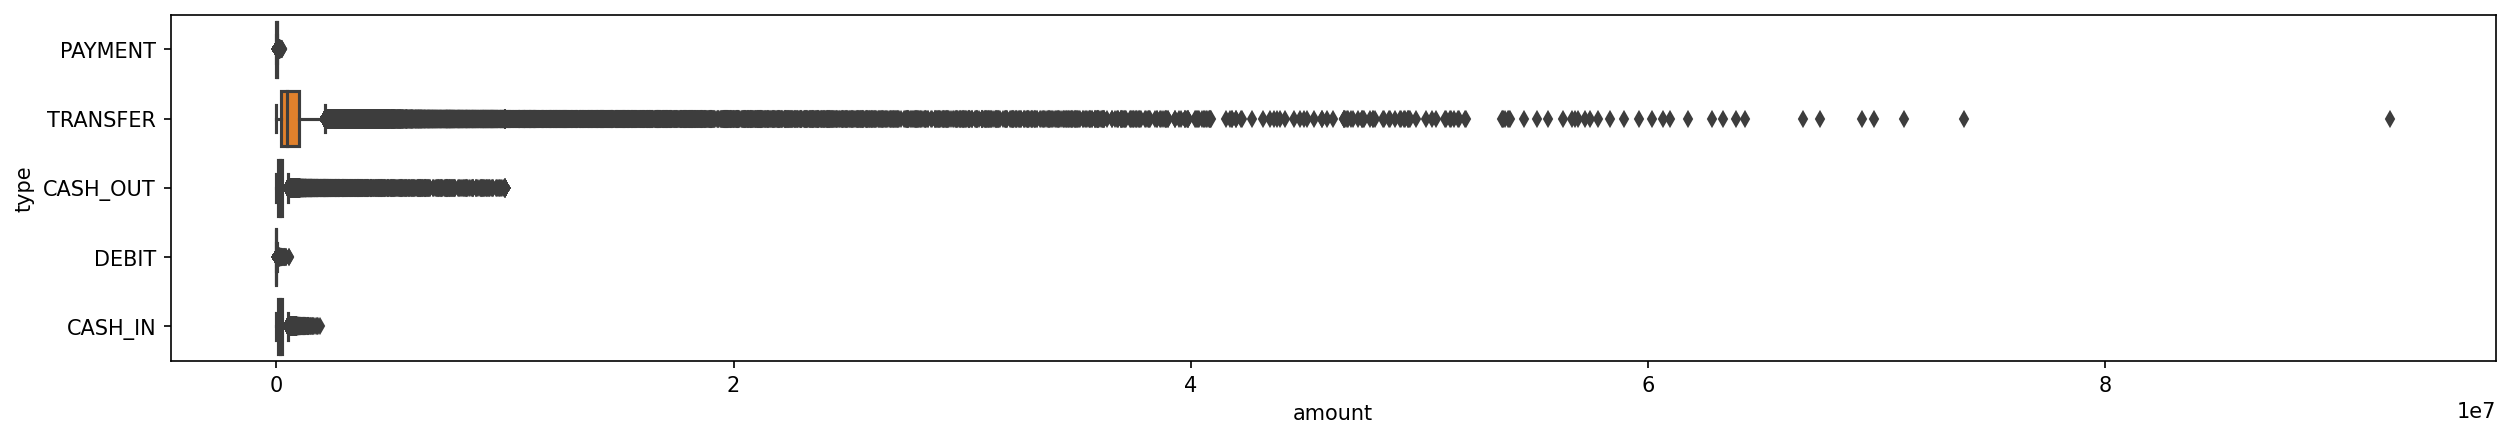

In [17]:
plt.figure(figsize=(20,3), dpi=150)
sns.boxplot(data=df, x='amount', y='type')
plt.show();

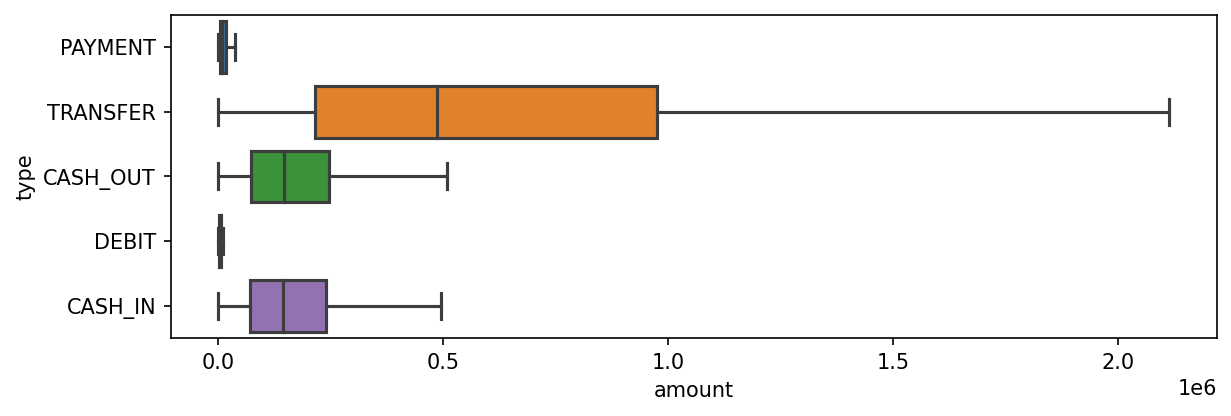

In [18]:
plt.figure(figsize=(9,2.8), dpi=150)
boxes = sns.boxplot(data=df, x='amount', y='type',
                    showfliers=False)    # showfliers will hide outliers for better clarity

<div style="background-color: #C1F2B0;
            border-radius: 10px;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
                font-size: 14px">
        From the above cell output: We can say that, it's better to not remove outliers as it may help to determine customers who make large or small transactions, does fall in isFraud Category or not!
    </li>
</ul>
    
</div>

In [19]:
q1 = df['amount'].quantile(0.25)
q3 = df['amount'].quantile(0.75)
iqr = q3 - q1
min_value = df['amount'].min()
max_value = df['amount'].max()

print("q1:", q1, "\nq3:", q3, "\nIQR:", iqr, "\nmin_value:", min_value, "\nmax_value:", max_value)

q1: 13389.57 
q3: 208721.4775 
IQR: 195331.9075 
min_value: 0.0 
max_value: 92445516.64


<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    Now let's check for <span style="color: #54B435;">correlation between Features</span> and <span style="color: #54B435;">multicollinearity</span>
</h1>
</div>

In [20]:
old_and_new_balance_ORIG_CORR = df['oldbalanceOrg'].corr(df['newbalanceOrig'])
old_and_new_balance_DEST_CORR = df['oldbalanceDest'].corr(df['newbalanceDest'])
amount_and_new_balance_dest_CORR = df['amount'].corr(df['newbalanceDest'])

isFraud_and_isFlaggedFraud_CORR = df['isFraud'].corr(df['isFlaggedFraud'])

print("Correlation between Old and New Balance ORIGIN:", old_and_new_balance_ORIG_CORR)
print("Correlation between Old and New Balance Destination:", old_and_new_balance_DEST_CORR)

print("\nCorrelation beteen Amount of Transaction done and New Balance at Destination:",
     amount_and_new_balance_dest_CORR)
print("\nCorrelation between isFraud and isFlaggedFraud:", isFraud_and_isFlaggedFraud_CORR)

Correlation between Old and New Balance ORIGIN: 0.9988027631722983
Correlation between Old and New Balance Destination: 0.9765685054475205

Correlation beteen Amount of Transaction done and New Balance at Destination: 0.459304267293283

Correlation between isFraud and isFlaggedFraud: 0.044109196513812086


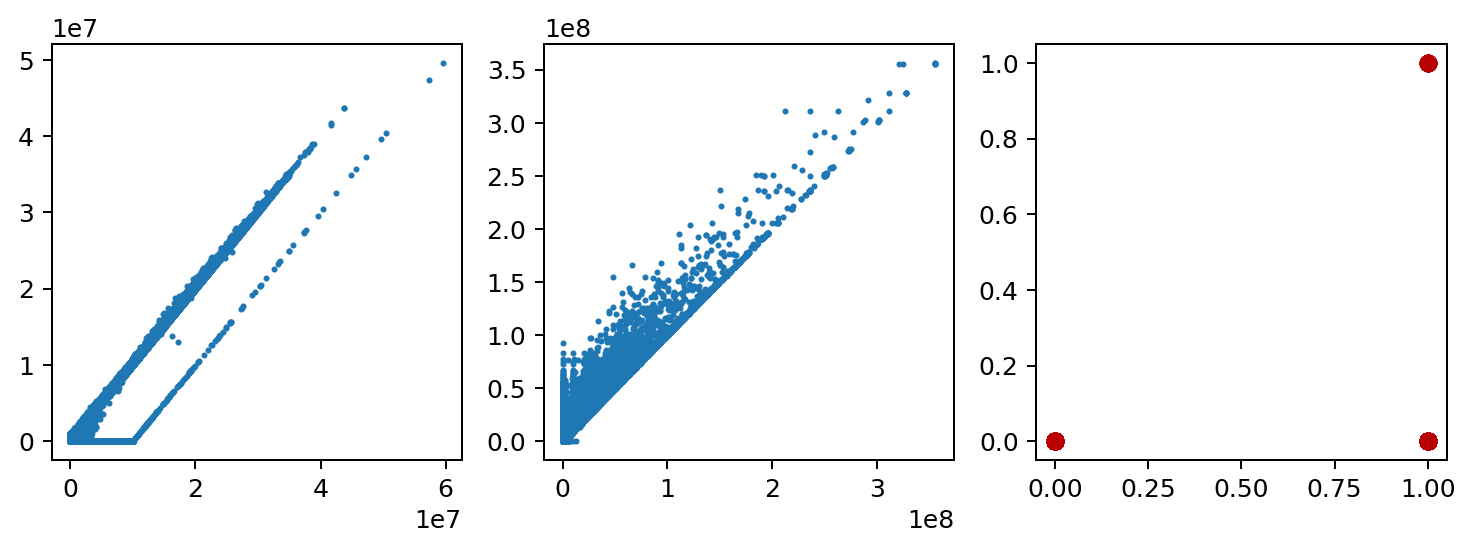

In [21]:
plt.figure(figsize=(10,3), dpi=180)
plt.subplot(131)
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], s=2)

plt.subplot(132)
plt.scatter(df['oldbalanceDest'], df['newbalanceDest'], s=2)

plt.subplot(133)
plt.scatter(df['isFraud'], df['isFlaggedFraud'], color='#B80000')

plt.show();

<div style="background-color: #C1F2B0;
            border-radius: 10px;">
<h1 style="text-indent: 1%;
           font-size: 14px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
    As we can see from above cell output...
</h1>
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 14px">
        There's a <b>+ve correlation in first 2 plots</b> whereas, there's <b>0 Correlation in 3rd plot</b>
    </li>
    <li style="color: black;
               font-size: 14px">
        That means, <b>(oldbalanceOrg & newbalanceOrig)</b> and <b>(oldbalanceDest & newbalanceDest)</b> exhibits potential multicollinearity!
    </li>
    <li style="color: black;
               font-size: 14px">
        <b>amount and newbalanceDest</b>: Their correlation of 0.4593 is moderate, not typically considered problematic for multicollinearity.
    </li>
</ul>
</div>

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    Drop: not required columns
</h1>
</div>

In [22]:
# this is our original df
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [23]:
new_df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
# dropping isFlaggedFraud because it has only 16 values with 1 rest all are 0!

In [24]:
new_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


# 
<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    Converting Categorical Data to Numerical using LabelEncoder <span style="color: #54B435">(As there're no Orders in Categories)</span>
</h1>
</div>

In [25]:
le = LabelEncoder()

In [26]:
le.fit(new_df['type'])
encoded_type = le.transform(new_df['type'])

In [27]:
# applying encoded type back to new_df
new_df['encoded_type'] = encoded_type

In [28]:
new_df = new_df.drop(['type'], axis=1)

In [29]:
new_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,encoded_type
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,3
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,3
2,1,181.00,181.00,0.00,0.00,0.00,1,4
3,1,181.00,181.00,0.00,21182.00,0.00,1,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,3
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,1
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,4
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,4


<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    let's seperate Input Features and Targets
</h1>
</div>

In [30]:
X = new_df.drop(['isFraud'], axis=1).values
y = df['isFraud'].values

In [31]:
# checking the shape
X.shape, y.shape

((6362620, 7), (6362620,))

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    now let's perform <span style="color: #54B435">train/test/split</span>
</h1>
</div>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
# checking the shape
X_train.shape # hence, there are 4.45 Million rows in X_train (after splitting)

(4453834, 7)

In [34]:
# checking the shape
X_test.shape # 1.9 Million rows in X_test (after splitting)

(1908786, 7)

In [35]:
X_train

array([[4.30000000e+01, 8.16689100e+04, 0.00000000e+00, ...,
        3.21330580e+05, 6.81758750e+05, 1.00000000e+00],
       [2.02000000e+02, 7.37850000e+02, 1.63409000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [1.80000000e+01, 2.05320400e+04, 4.77390000e+04, ...,
        1.97302970e+06, 1.95249765e+06, 0.00000000e+00],
       ...,
       [3.47000000e+02, 2.12458500e+04, 0.00000000e+00, ...,
        1.29802630e+05, 1.51048480e+05, 1.00000000e+00],
       [1.53000000e+02, 4.96681000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [2.53000000e+02, 7.58492480e+05, 0.00000000e+00, ...,
        3.36036501e+06, 4.11885749e+06, 4.00000000e+00]])

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    Now let's <span style="color: #54B435">scale</span> the column values
</h1>
</div>

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    Converting From <span style="color: #54B435">Numpy Array</span> To <span style="color: #54B435">Torch Tensor</span>
</h1>
</div>

In [38]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train) 
y_test_tensor = torch.FloatTensor(y_test)

# converting 'y_train' and 'y_test' to float tensor because the BCEWithLogitsLoss() accepts input and target "FLOAT" values!

In [39]:
print("Type of X_train:", type(X_train), "\n\nType of X_train_tensor:", type(X_train_tensor))

Type of X_train: <class 'numpy.ndarray'> 

Type of X_train_tensor: <class 'torch.Tensor'>


In [40]:
# checking the shape
X_train_tensor.shape

torch.Size([4453834, 7])

In [41]:
# reshaping because target shape must be same as input feature shape!
y_train_tensor_reshaped = y_train_tensor.view(-1, 1)
y_test_tensor_reshaped = y_test_tensor.view(-1, 1)

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    Creating <span style="color: #54B435">Neural Network model</span> for <span style="color: #54B435">Binary Classification</span>
</h1>
</div>

In [42]:
class NNBinaryClassificationModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NNBinaryClassificationModel, self).__init__()
        self.input_layer = nn.Linear(input_dim, 2)
        self.dropout = nn.Dropout(p=0.2)    # probability of 30%, dropping... to address overfitting problem
        self.output_layer = nn.Linear(2, output_dim)
        self.relu = nn.ReLU() # loading non-linearity into the model
        
    def forward(self, x):
        out = self.relu(self.input_layer(x))
        out = self.dropout(out)  # Apply dropout
        out = self.output_layer(out)
        out = torch.sigmoid(out)    # applying sigmoid for to get probabilities at output layer
        return out

In [43]:
input_dim = 7 # because there are total 7 features that need to be passed
output_dim = 1 # because we want to predict either 1(isFraud) or 0(is Not Fraud)
model = NNBinaryClassificationModel(input_dim, output_dim)

In [44]:
# defining learning rate and creating optimizer & loss function object
learning_rate = 0.1
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [45]:
def train_network(model, optimizer, criterion,
                  X_train_tensor, y_train_tensor_reshaped, X_test_tensor, y_test_tensor_reshaped,
                  num_epochs,
                  train_losses, test_losses,
                  train_accuracies, test_accuracies):
    for epoch in range(num_epochs):
        
        # first clearning out the gradients from last step "loss.backward()"
        optimizer.zero_grad()
        
        # forward pass and loss calculation (train)
        output_train = model(X_train_tensor)
        loss_train = criterion(output_train, y_train_tensor_reshaped)
        
        # Calculate gradients (Back-Propagation)
        loss_train.backward()
        
        # update the weights
        optimizer.step()
        
        # Accuracy calculation (train)
        predicted_train = torch.round(output_train.detach())  # Round predictions for binary classification
        correct_train = (predicted_train == y_train_tensor_reshaped).float().sum()  # Number of correct predictions
        accuracy_train = correct_train / y_train_tensor_reshaped.shape[0]  # Calculate accuracy
        
        # forward pass and loss calculation (test)
        output_test = model(X_test_tensor)
        loss_test = criterion(output_test, y_test_tensor_reshaped)
        
        # Accuracy calculation (test)
        predicted_test = torch.round(output_test.detach())  # Round predictions for binary classification
        correct_test = (predicted_test == y_test_tensor_reshaped).float().sum()  # Number of correct predictions
        accuracy_test = correct_test / y_test_tensor_reshaped.shape[0]  # Calculate accuracy
        
        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()
        train_accuracies[epoch] = accuracy_train.item()
        test_accuracies[epoch] = accuracy_test.item()
        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Train Acc: {accuracy_train.item():.4f}, Test Loss: {loss_test.item():.4f}, Test Acc: {accuracy_test.item():.4f}")

In [46]:
num_epochs = 8
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

train_accuracies = np.zeros(num_epochs)
test_accuracies = np.zeros(num_epochs)

In [47]:
train_network(model, optimizer, criterion,
              X_train_tensor, y_train_tensor_reshaped, X_test_tensor, y_test_tensor_reshaped,
              num_epochs,
              train_losses, test_losses, train_accuracies, test_accuracies)

Epoch 1/8, Train Loss: 0.9837, Train Acc: 0.3729, Test Loss: 0.9330, Test Acc: 0.6284
Epoch 2/8, Train Loss: 0.9330, Train Acc: 0.6283, Test Loss: 0.8842, Test Acc: 0.7531
Epoch 3/8, Train Loss: 0.8840, Train Acc: 0.7535, Test Loss: 0.8421, Test Acc: 0.8048
Epoch 4/8, Train Loss: 0.8421, Train Acc: 0.8047, Test Loss: 0.8081, Test Acc: 0.8455
Epoch 5/8, Train Loss: 0.8081, Train Acc: 0.8450, Test Loss: 0.7821, Test Acc: 0.8606
Epoch 6/8, Train Loss: 0.7820, Train Acc: 0.8605, Test Loss: 0.7630, Test Acc: 0.9987
Epoch 7/8, Train Loss: 0.7630, Train Acc: 0.9987, Test Loss: 0.7498, Test Acc: 0.9987
Epoch 8/8, Train Loss: 0.7498, Train Acc: 0.9987, Test Loss: 0.7407, Test Acc: 0.9987


<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
    Visualizing <span style="color: #54B435">Train and Test Loss</span> VS. <span style="color: #54B435">Train and Test Accuracies</span>
</h1>
</div>

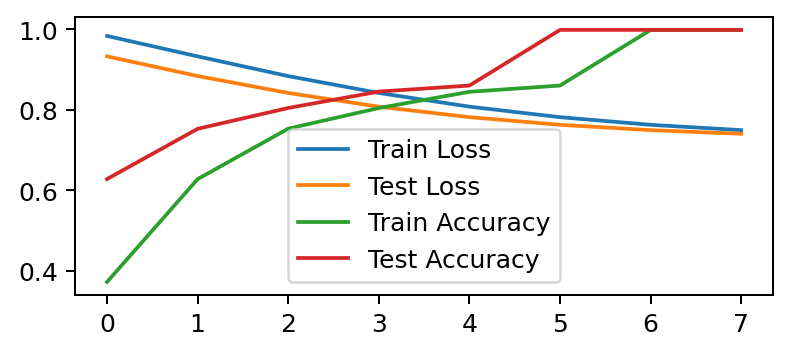

In [48]:
plt.figure(figsize=(5,2), dpi=180)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.legend()
plt.show();

<div style="background-color: white;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
           Conclusion:
</h1>
<h3 style="text-indent: 1%;
           font-size: 16px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
           1. Describing about missing values, outliers and multicollinearity:
</h3>
 <ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 14px">
        Checked for missing values, but found no NaN values in dataset
    </li>
     <li style="color: black;
               font-size: 14px">
        Did outliers detection and found several outliers in TRANSFER and CASH-OUT feature with respect to amount
    </li>
     <li style="color: black;
               font-size: 14px">
        oldbalanceOrg and newbalanceOrig, oldbalanceDest and newbalanceDest have strong correlation
    </li>
     <li style="color: black;
               font-size: 14px">
        newbalanceDest does show multicollinearity but not potentially more
    </li>
</ul>

<h3 style="text-indent: 1%;
           font-size: 16px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
           2. Describing Fraud Detection model:
</h3>
 <ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 14px">
        Used LabelEncoder for encoding 'type' column as it consits of categorical values
    </li>
     <li style="color: black;
               font-size: 14px">
        Did train/test/split then and applied StandardScaler() that transforms column values to mean=0 and S.D=1
    </li>
     <li style="color: black;
               font-size: 14px">
        Using pytorch, created a simple neural network with an input and output layer, added dropout layer to address the overfitting issue!
    </li>
     <li style="color: black;
               font-size: 14px">
        Later computed and plotted Training loss v/s Training accuracy and Test Loss v/s Test accuracy.
    </li>
</ul>
    
    
<h3 style="text-indent: 1%;
           font-size: 16px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
           3. Key factors that predict Fraudlent customers:
</h3>
 <ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 14px">
        Based on the amount of transaction they do, at what unit of time and who do what type of transaction and how much, are all the factors that predict Fraudlent customers.
</ul>
    
<h3 style="text-indent: 1%;
           font-size: 16px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
           4. What kind of prevention should be adopted while company update its infrastructure?
</h3>
 <ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 14px">
        While company update it's infrastructure, it must be able to first track where the money transfered in order to find the culprit later.
</ul>
</div>